# Natural Language Inference

*Submitted by: Team 26*

### Library Imports

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
df = pd.read_csv('./snli_1.0/snli_1.0_train.txt', delimiter='\t', encoding='utf-8', on_bad_lines='skip')

In [99]:
df.head()

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,3416050480.jpg#4,3416050480.jpg#4r1n,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",3416050480.jpg#4,3416050480.jpg#4r1c,contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",3416050480.jpg#4,3416050480.jpg#4r1e,entailment,NaN,NaN,NaN,NaN
3,neutral,( Children ( ( ( smiling and ) waving ) ( at c...,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...,Children smiling and waving at camera,They are smiling at their parents,2267923837.jpg#2,2267923837.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
4,entailment,( Children ( ( ( smiling and ) waving ) ( at c...,( There ( ( are children ) present ) ),(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...,Children smiling and waving at camera,There are children present,2267923837.jpg#2,2267923837.jpg#2r1e,entailment,NaN,NaN,NaN,NaN


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550152 entries, 0 to 550151
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   gold_label              550152 non-null  object
 1   sentence1_binary_parse  550152 non-null  object
 2   sentence2_binary_parse  550146 non-null  object
 3   sentence1_parse         550152 non-null  object
 4   sentence2_parse         550152 non-null  object
 5   sentence1               550152 non-null  object
 6   sentence2               550146 non-null  object
 7   captionID               550152 non-null  object
 8   pairID                  550152 non-null  object
 9   label1                  550152 non-null  object
 10  label2                  39370 non-null   object
 11  label3                  39395 non-null   object
 12  label4                  39383 non-null   object
 13  label5                  36914 non-null   object
dtypes: object(14)
memory usage: 58.8+ MB

In [101]:
print(df.shape)


(550152, 14)


In [102]:
print(df['gold_label'].nunique())
print(df['sentence1'].nunique())
print(df['sentence2'].nunique())

4
150736
480040


In [103]:
print(df.isnull().sum())

gold_label                     0
sentence1_binary_parse         0
sentence2_binary_parse         6
sentence1_parse                0
sentence2_parse                0
sentence1                      0
sentence2                      6
captionID                      0
pairID                         0
label1                         0
label2                    510782
label3                    510757
label4                    510769
label5                    513238
dtype: int64


In [104]:
print(df.duplicated().sum())


0


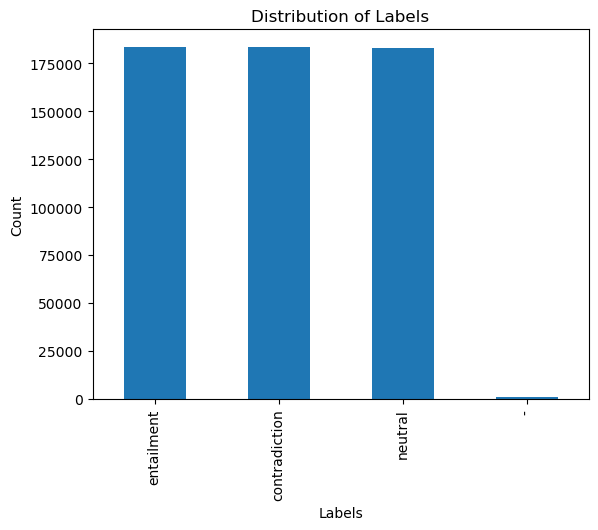

In [105]:
df['gold_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [106]:
pivot = df.pivot_table(index='label1', columns='gold_label', values='sentence1', aggfunc='count')
print(pivot)

gold_label       -  contradiction  entailment  neutral
label1                                                
contradiction  154         182753          49      428
entailment     248             88      182393      655
neutral        383            346         974   181681


In [107]:
df['sentence1_word_count'] = df['sentence1'].apply(lambda x: len(str(x).split(" ")))
df['sentence2_word_count'] = df['sentence2'].apply(lambda x: len(str(x).split(" ")))
df['sentence1_char_count'] = df['sentence1'].apply(lambda x: len(str(x)))
df['sentence2_char_count'] = df['sentence2'].apply(lambda x: len(str(x)))
print(df[['sentence1_word_count', 'sentence2_word_count', 'sentence1_char_count', 'sentence2_char_count']].describe())

       sentence1_word_count  sentence2_word_count  sentence1_char_count  \
count         550152.000000         550152.000000         550152.000000   
mean              12.850772              7.420411             66.279027   
std                5.657270              3.071719             29.390922   
min                2.000000              1.000000              7.000000   
25%                9.000000              5.000000             46.000000   
50%               12.000000              7.000000             60.000000   
75%               16.000000              9.000000             80.000000   
max               78.000000             58.000000            402.000000   

       sentence2_char_count  
count         550152.000000  
mean              37.477670  
std               15.867523  
min                1.000000  
25%               26.000000  
50%               34.000000  
75%               45.000000  
max              295.000000  


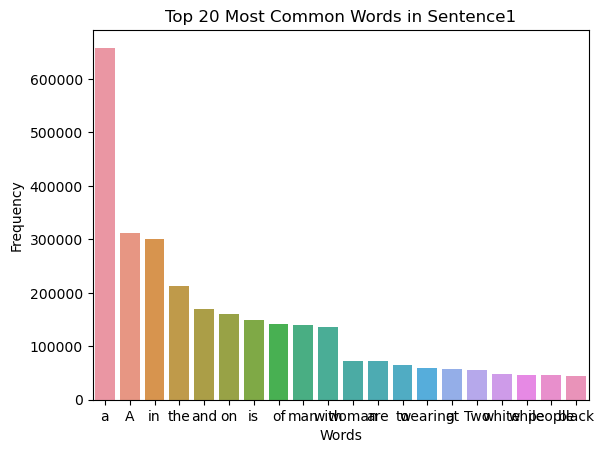

In [108]:
from collections import Counter
words = Counter(" ".join(df["sentence1"]).split()).most_common(20)
words_df = pd.DataFrame(words, columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=words_df)
plt.title('Top 20 Most Common Words in Sentence1')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Logistic Regression

In [109]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

#### Data-Preprocessing

In this section, we are extracting all the sentences in numpy arrays in order for them to process. To preprocess them we have followed the following steps

1. Dropping the values which have NULLs in them
2. Apply tf-idf on the sentences. The `sklearn` implementation of Tfidf vectorizer removes the **english stopwords** and *lowercase* them which helps in minimising the dimension of the vectors.

In [110]:
df.drop(columns=["sentence1_binary_parse", "sentence2_binary_parse", "sentence1_parse", "sentence2_parse", "captionID", "pairID", "label1", "label2", "label3", "label4", "label5", "sentence1_word_count", "sentence2_word_count", "sentence1_char_count", "sentence2_char_count"], inplace=True)

In [111]:
df.head()

,gold_label,sentence1,sentence2
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette."
2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse."
3,neutral,Children smiling and waving at camera,They are smiling at their parents
4,entailment,Children smiling and waving at camera,There are children present


In [112]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [113]:
sentence_list_1 = df["sentence1"].to_numpy()
sentence_list_2 = df["sentence2"].to_numpy()
label_list = df["gold_label"].to_numpy()

In [114]:
sentence_list_1[:10]

array(['A person on a horse jumps over a broken down airplane.',
       'A person on a horse jumps over a broken down airplane.',
       'A person on a horse jumps over a broken down airplane.',
       'Children smiling and waving at camera',
       'Children smiling and waving at camera',
       'Children smiling and waving at camera',
       'A boy is jumping on skateboard in the middle of a red bridge.',
       'A boy is jumping on skateboard in the middle of a red bridge.',
       'A boy is jumping on skateboard in the middle of a red bridge.',
       'An older man sits with his orange juice at a small table in a coffee shop while employees in bright colored shirts smile in the background.'],
      dtype=object)

In [115]:
print(len(sentence_list_1), len(sentence_list_2))

550146 550146


In [128]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

catsent = []


for i in range(len(sentence_list_1)):
    catsent.append(f"{sentence_list_1[i]} {sentence_list_2[i]}")


In [129]:
X_train = tfidf_vectorizer.fit_transform(catsent)
y_train = df['gold_label']

In [130]:
label_list.shape

(550146,)

In [131]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, label_list)

LogisticRegression(max_iter=10000)

In [140]:
test_df = pd.read_csv('./snli_1.0/snli_1.0_test.txt', delimiter='\t', encoding='utf-8', on_bad_lines='skip')

In [141]:
test_df.head()

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( The church ) ( ( has ( cracks ( in ( the c...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (S (NP (DT The) (NN church)) (VP (VBZ ha...,This church choir sings to the masses as they ...,The church has cracks in the ceiling.,2677109430.jpg#1,2677109430.jpg#1r1n,neutral,contradiction,contradiction,neutral,neutral
1,entailment,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( The church ) ( ( is ( filled ( with song )...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (S (NP (DT The) (NN church)) (VP (VBZ is...,This church choir sings to the masses as they ...,The church is filled with song.,2677109430.jpg#1,2677109430.jpg#1r1e,entailment,entailment,entailment,neutral,entailment
2,contradiction,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( ( A choir ) ( singing ( at ( a ( baseball ...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (NP (NP (DT A) (NN choir)) (VP (VBG sing...,This church choir sings to the masses as they ...,A choir singing at a baseball game.,2677109430.jpg#1,2677109430.jpg#1r1c,contradiction,contradiction,contradiction,contradiction,contradiction
3,neutral,( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...,( ( The woman ) ( ( is young ) . ) ),(ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...,(ROOT (S (NP (DT The) (NN woman)) (VP (VBZ is)...,"A woman with a green headscarf, blue shirt and...",The woman is young.,6160193920.jpg#4,6160193920.jpg#4r1n,neutral,neutral,neutral,neutral,neutral
4,entailment,( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...,( ( The woman ) ( ( is ( very happy ) ) . ) ),(ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...,(ROOT (S (NP (DT The) (NN woman)) (VP (VBZ is)...,"A woman with a green headscarf, blue shirt and...",The woman is very happy.,6160193920.jpg#4,6160193920.jpg#4r1e,entailment,entailment,contradiction,entailment,neutral


In [142]:
test_df.drop(columns=["sentence1_binary_parse", "sentence2_binary_parse", "sentence1_parse", "sentence2_parse", "captionID", "pairID", "label1", "label2", "label3", "label4", "label5"], inplace=True)

In [143]:
test_df.head()

,gold_label,sentence1,sentence2
0,neutral,This church choir sings to the masses as they ...,The church has cracks in the ceiling.
1,entailment,This church choir sings to the masses as they ...,The church is filled with song.
2,contradiction,This church choir sings to the masses as they ...,A choir singing at a baseball game.
3,neutral,"A woman with a green headscarf, blue shirt and...",The woman is young.
4,entailment,"A woman with a green headscarf, blue shirt and...",The woman is very happy.


In [144]:
test_df.dropna(inplace=True)
test_df.reset_index(drop=True, inplace=True)


In [145]:
X_test = tfidf_vectorizer.transform(test_df['sentence1'] + ' ' + test_df['sentence2'])
y_test = test_df['gold_label']

In [146]:
y_pred = lr.predict(X_test)

In [147]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

               precision    recall  f1-score   support

            -       0.00      0.00      0.00       176
contradiction       0.54      0.56      0.55      3237
   entailment       0.55      0.59      0.57      3368
      neutral       0.55      0.51      0.53      3219

     accuracy                           0.54     10000
    macro avg       0.41      0.41      0.41     10000
 weighted avg       0.53      0.54      0.54     10000

Accuracy: 0.5436


/Users/bhanujggandhi/devtools/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhanujggandhi/devtools/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhanujggandhi/devtools/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

In [148]:
# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(lr, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, label_list)

y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..............................................C=0.1; total time= 1.3min
[CV] END ..............................................C=0.1; total time= 1.4min
[CV] END ..............................................C=0.1; total time= 1.4min
[CV] END ..............................................C=0.1; total time= 1.4min
[CV] END ..............................................C=0.1; total time= 1.5min
[CV] END ................................................C=1; total time= 3.6min
[CV] END ................................................C=1; total time= 4.0min
[CV] END ................................................C=1; total time= 4.3min
[CV] END ................................................C=1; total time= 3.9min
[CV] END ................................................C=1; total time= 4.0min
[CV] END ...............................................C=10; total time= 7.4min
[CV] END ........................................

In [152]:
print(grid_search.best_params_)

print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

{'C': 10}
               precision    recall  f1-score   support

            -       0.00      0.00      0.00       176
contradiction       0.54      0.57      0.55      3237
   entailment       0.55      0.58      0.57      3368
      neutral       0.55      0.50      0.52      3219

     accuracy                           0.54     10000
    macro avg       0.41      0.42      0.41     10000
 weighted avg       0.53      0.54      0.54     10000

Accuracy: 0.5441


/Users/bhanujggandhi/devtools/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhanujggandhi/devtools/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhanujggandhi/devtools/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

## BiDirectional LSTM

In [187]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

import nltk

In [172]:

# Load the dataset
train_df = pd.read_csv('./snli_1.0/snli_1.0_train.txt', delimiter='\t', encoding='utf-8',on_bad_lines='skip')
val_df = pd.read_csv('./snli_1.0/snli_1.0_dev.txt', delimiter='\t', encoding='utf-8',on_bad_lines='skip')
test_df = pd.read_csv('./snli_1.0/snli_1.0_test.txt', delimiter='\t', encoding='utf-8',on_bad_lines='skip')


In [173]:

# Preprocess the data
train_df.dropna(inplace=True)
train_df.drop(train_df.loc[train_df['gold_label']=='-'].index, inplace=True)
train_df.reset_index(drop=True, inplace=True)

val_df.dropna(inplace=True)
val_df.drop(val_df.loc[val_df['gold_label']=='-'].index, inplace=True)
val_df.reset_index(drop=True, inplace=True)

test_df.dropna(inplace=True)
test_df.drop(test_df.loc[test_df['gold_label']=='-'].index, inplace=True)
test_df.reset_index(drop=True, inplace=True)


In [177]:
train_df['sentence1'] = train_df['sentence1'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x.lower())]))
train_df['sentence2'] = train_df['sentence2'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x.lower())]))
val_df['sentence1'] = val_df['sentence1'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x.lower())]))
val_df['sentence2'] = val_df['sentence2'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x.lower())]))
test_df['sentence1'] = test_df['sentence1'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x.lower())]))
test_df['sentence2'] = test_df['sentence2'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x.lower())]))

In [178]:
# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(train_df['gold_label'])
num_classes = len(label_encoder.classes_)

In [179]:
print(num_classes)

3


In [180]:
# Make sure all labels in the validation/test set are included in the training set labels
val_labels = set(val_df['gold_label'].unique())
test_labels = set(test_df['gold_label'].unique())
new_labels = val_labels.union(test_labels) - set(label_encoder.classes_)
if new_labels:
    label_encoder.classes_ = np.concatenate([label_encoder.classes_, np.array(list(new_labels))])
    num_classes = len(label_encoder.classes_)

y_train = label_encoder.transform(train_df['gold_label'])
y_val = label_encoder.transform(val_df['gold_label'])
y_test = label_encoder.transform(test_df['gold_label'])

In [181]:
train_df["gold_label"].unique()

array(['neutral', 'contradiction', 'entailment'], dtype=object)

In [182]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['sentence1'] + ' ' + train_df['sentence2'])

X_train = tokenizer.texts_to_sequences(train_df['sentence1'] + ' ' + train_df['sentence2'])
X_val = tokenizer.texts_to_sequences(val_df['sentence1'] + ' ' + val_df['sentence2'])
X_test = tokenizer.texts_to_sequences(test_df['sentence1'] + ' ' + test_df['sentence2'])

In [183]:
# Pad the sequences
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_val = pad_sequences(X_val, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Convert the labels to one-hot vectors
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-14 19:37:59.855497: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-14 19:37:59.857182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [191]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [192]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         49664     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

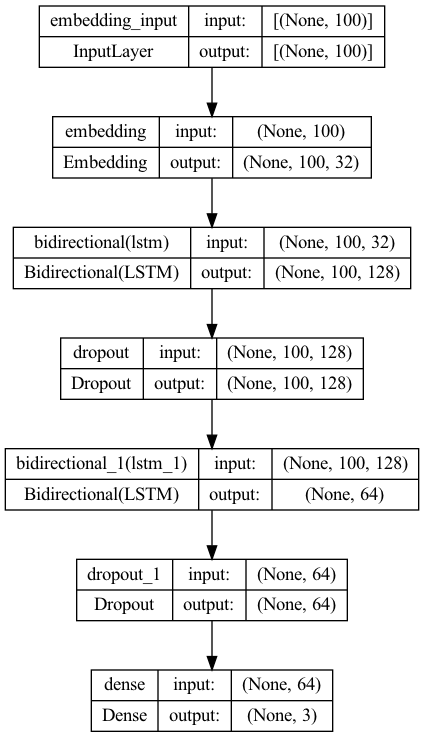

In [193]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [194]:

# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [195]:

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128, callbacks=[mc, es])

Epoch 1/20


2023-03-14 19:41:03.353352: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


284/284 [==============================] - ETA: 0s - loss: 0.9903 - accuracy: 0.4975
Epoch 1: val_accuracy improved from -inf to 0.58672, saving model to best_model.h5
284/284 [==============================] - 75s 256ms/step - loss: 0.9903 - accuracy: 0.4975 - val_loss: 0.8924 - val_accuracy: 0.5867
Epoch 2/20
284/284 [==============================] - ETA: 0s - loss: 0.8392 - accuracy: 0.6261
Epoch 2: val_accuracy improved from 0.58672 to 0.60330, saving model to best_model.h5
284/284 [==============================] - 70s 247ms/step - loss: 0.8392 - accuracy: 0.6261 - val_loss: 0.8729 - val_accuracy: 0.6033
Epoch 3/20
284/284 [==============================] - ETA: 0s - loss: 0.7715 - accuracy: 0.6647
Epoch 3: val_accuracy improved from 0.60330 to 0.60869, saving model to best_model.h5
284/284 [==============================] - 70s 247ms/step - loss: 0.7715 - accuracy: 0.6647 - val_loss: 0.8631 - val_accuracy: 0.6087
Epoch 4/20
284/284 [==============================] - ETA: 0s - lo

In [196]:
model.load_weights('best_model.h5')
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

307/307 [==============================] - 25s 79ms/step


In [197]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57      2853
           1       0.68      0.61      0.64      3750
           2       0.60      0.60      0.60      3212

    accuracy                           0.61      9815
   macro avg       0.61      0.61      0.61      9815
weighted avg       0.61      0.61      0.61      9815

